In [1]:
%load_ext autoreload
%autoreload 2

import torch
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from util.nlp import QA, Tokenizer
from util.model import QaPredictModel

In [2]:
with open('model/vocab.pickle', 'rb') as f:
    vocab = pickle.load(f)

with open('model/weights.pickle', 'rb') as f:
    weights = pickle.load(f)

def answer(paragraph, question, print_answer=True):
    qas = QA(tokenizer=Tokenizer(vocab=vocab))
    p = qas.add_paragraph(paragraph)
    q = qas.add_question(question)
    qas.add(p, q)

    X, y = qas.get_Xy(tqdm_show=False)
    embedding = torch.Tensor(qas.tokenizer.vocab.embeddings)
    model = QaPredictModel({
        'num_word_features': len(X['paragraph_word_features'].iloc[0][0]),
        'num_features': len(X['paragraph_features'].iloc[0][0]),
        'hidden_size': 64,
        'doc_layers': 3,
        'question_layers': 3,
        'dropout_emb': 0.3,
        'dropout_rnn': 0.3,
        'tune_partial': 0,
        'cuda': False
    }, embedding, weights)

    predict = list(model.predicts(X, y, tqdm_show=False))[0]
    
    if print_answer:
        print('Answer: ' + predict.answer)
        tokens = pd.DataFrame({'start': predict.scores_start, 'end': predict.scores_end}, index=p.tokens)
        tokens.iloc[::-1].plot.barh(figsize=(10, 0.2 * len(tokens.index)), width=0.8)
        plt.show()

    return predict

Answer: джва года


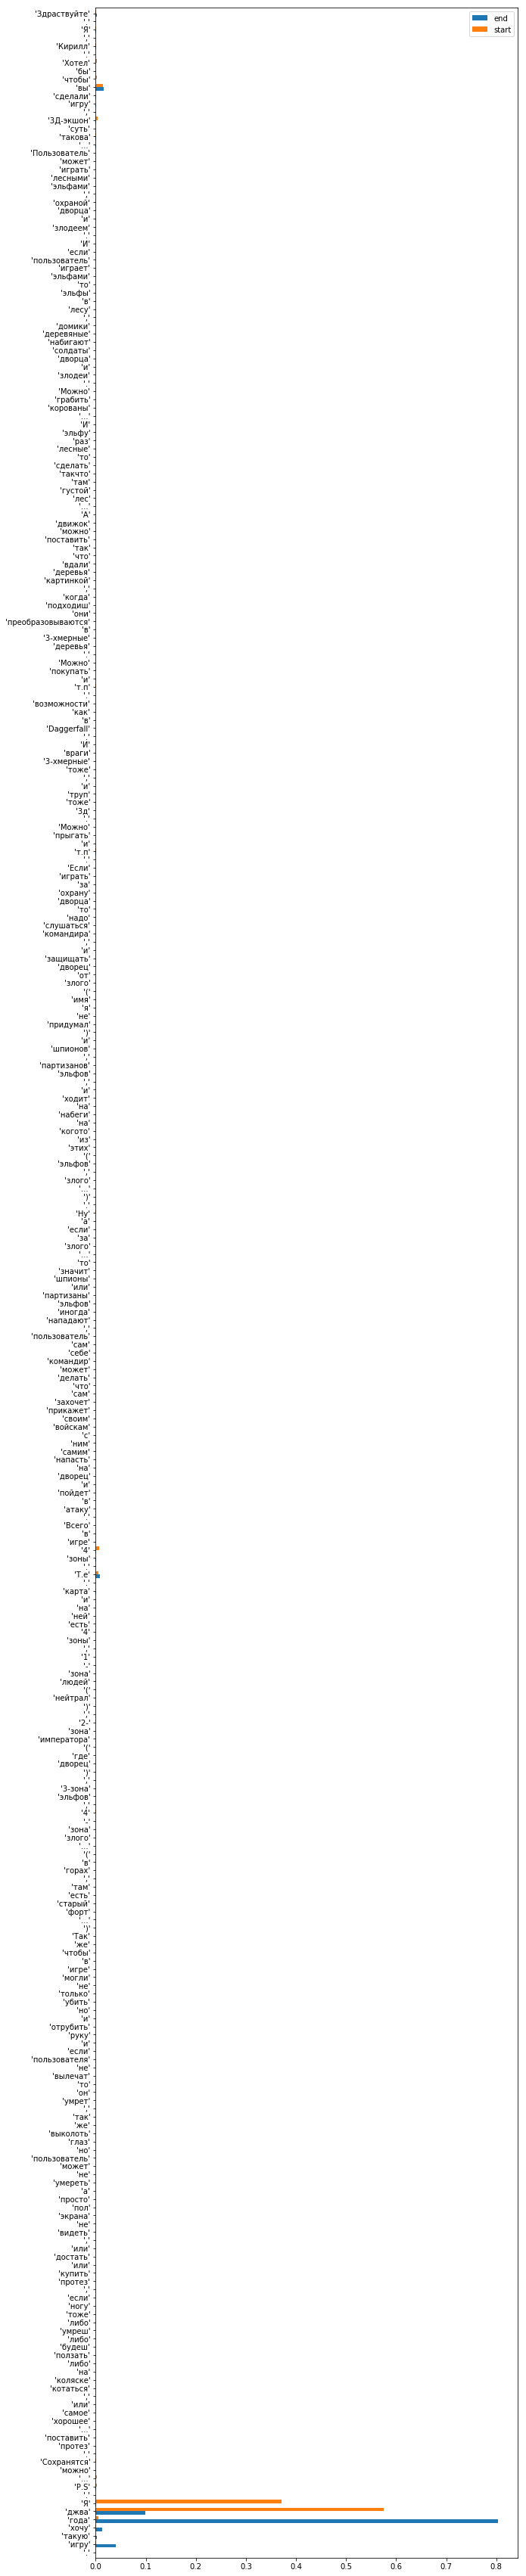

'джва года'

In [3]:
paragraph = '''Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...
Пользователь может играть лесными эльфами, охраной дворца и злодеем. И если пользователь играет эльфами то эльфы в лесу,
домики деревяные набигают солдаты дворца и злодеи. Можно грабить корованы... И эльфу раз лесные то сделать такчто там густой лес...
А движок можно поставить так что вдали деревья картинкой, когда подходиш они преобразовываются в 3-хмерные деревья.
Можно покупать и т.п. возможности как в Daggerfall. И враги 3-хмерные тоже, и труп тоже 3д. Можно прыгать и т.п.
Если играть за охрану дворца то надо слушаться командира, и защищать дворец от злого (имя я не придумал) и шпионов,
партизанов эльфов, и ходит на набеги на когото из этих (эльфов, злого...). Ну а если за злого... то значит шпионы или партизаны
эльфов иногда нападают, пользователь сам себе командир может делать что сам захочет прикажет своим войскам с ним самим
напасть на дворец и пойдет в атаку. Всего в игре 4 зоны. Т.е. карта и на ней есть 4 зоны, 1 - зона людей (нейтрал),
2- зона императора (где дворец), 3-зона эльфов, 4 - зона злого... (в горах, там есть старый форт...)

Так же чтобы в игре могли не только убить но и отрубить руку и если пользователя не вылечат то он умрет,
так же выколоть глаз но пользователь может не умереть а просто пол экрана не видеть, или достать или купить протез,
если ногу тоже либо умреш либо будеш ползать либо на коляске котаться, или самое хорошее... поставить протез. Сохранятся можно...

P.S. Я джва года хочу такую игру.'''

answer(paragraph, 'Сколько лет Кирилл ждет игру?')